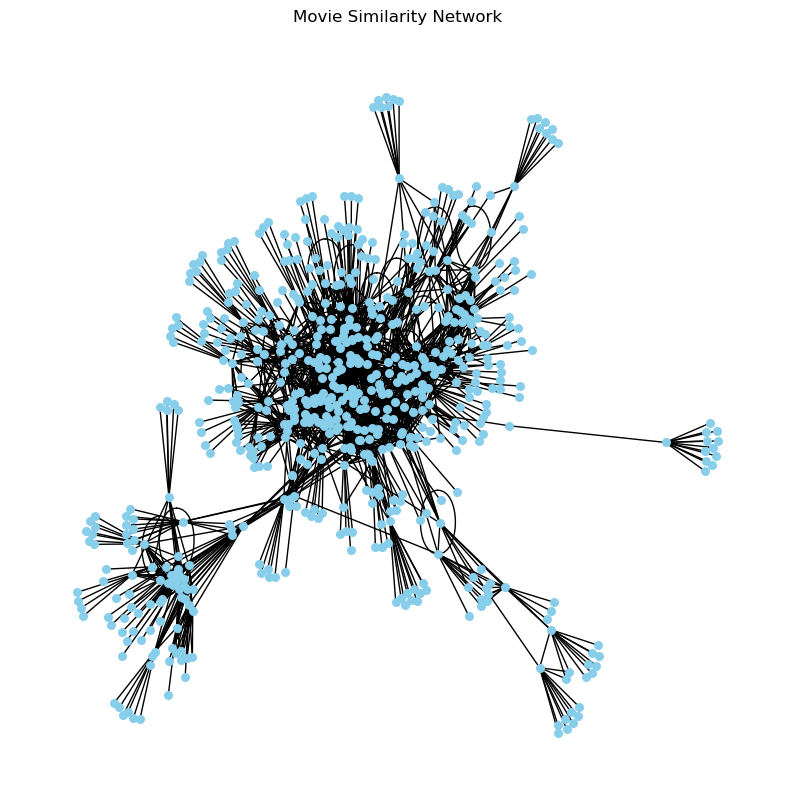

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/Users/nerea/Documents/MasterDTU/SocialGraphs_fall24/Projects/socialGraphs_fall24/FinalProject/csv/top_movie_data_with_similar.csv'  # Replace with the actual file path


df = pd.read_csv(file_path)

# Create an empty undirected graph
G = nx.Graph()

# Add nodes and edges based on the similarity list
for index, row in df.iterrows():
    film = row['Name']
    similar_films = row['Similar Movies'].split(', ')  # Splitting the similar films into a list
    
    # Add the film as a node (it will be added automatically when creating edges)
    G.add_node(film)
    
    # Add edges between the film and its similar films
    for similar_film in similar_films:
        G.add_edge(film, similar_film)

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=False, node_size=30, node_color='skyblue', font_size=10)
plt.title("Movie Similarity Network")
plt.axis('off')
plt.show()


In [9]:
# print num of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 646
Number of edges: 2431


In [10]:
# Find all self-loops in the graph
self_loops = list(nx.selfloop_edges(G))

# Delete all self-loops
for edge in self_loops:
    G.remove_edge(edge[0], edge[1])


Number of nodes: 646
Number of edges: 2403


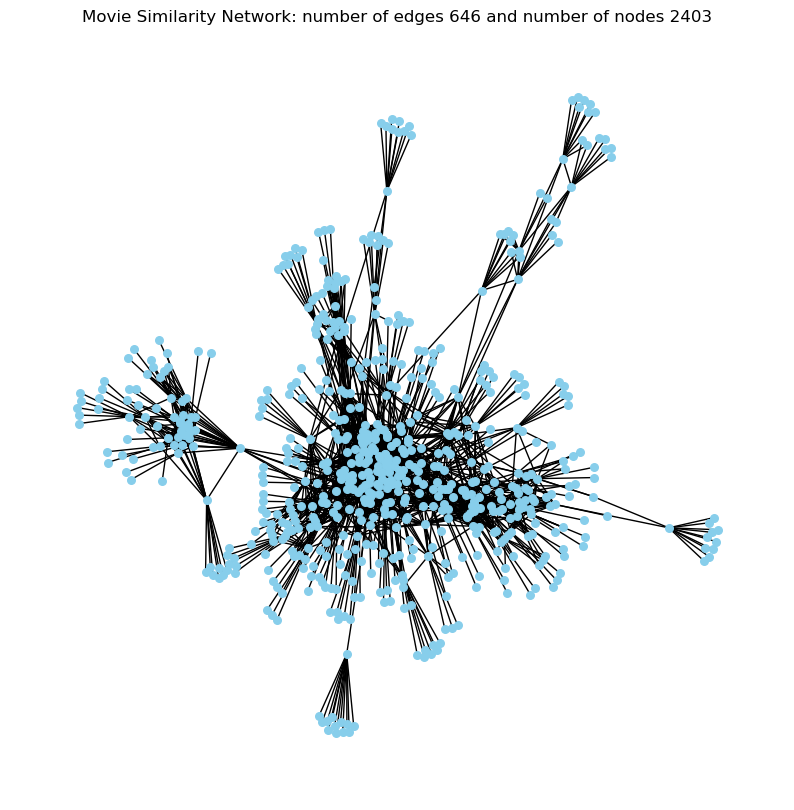

In [11]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=False, node_size=30, node_color='skyblue', font_size=10)
plt.title(f"Movie Similarity Network: number of edges {G.number_of_nodes()} and number of nodes {G.number_of_edges()}")
plt.axis('off')
plt.show()

In [12]:
# Calculate the average degree of the graph
degrees = [degree for node, degree in G.degree()]
average_degree = sum(degrees) / len(degrees)
print("Average degree:", average_degree)

Average degree: 7.439628482972136


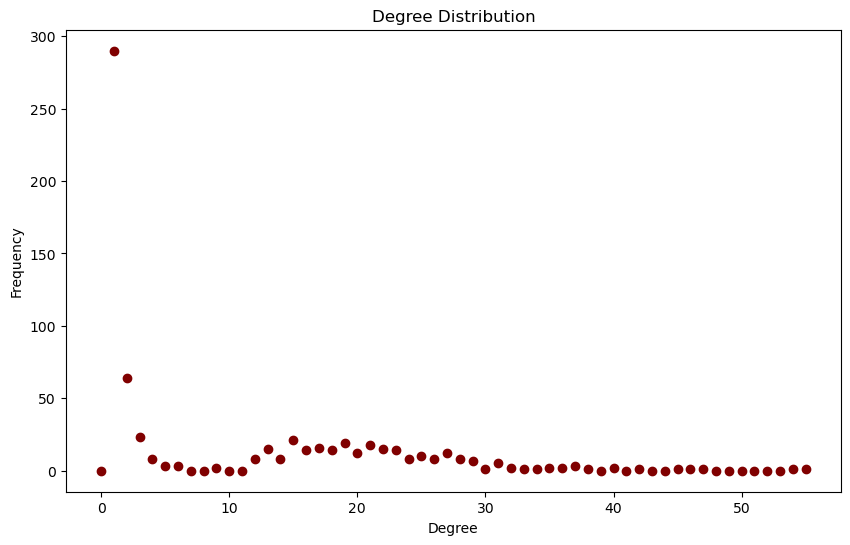

In [27]:
# Calculate the degree distribution of the graph
degree_distribution = nx.degree_histogram(G)
plt.figure(figsize=(10, 6))
plt.plot(degree_distribution, 'o', color='maroon')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.show()


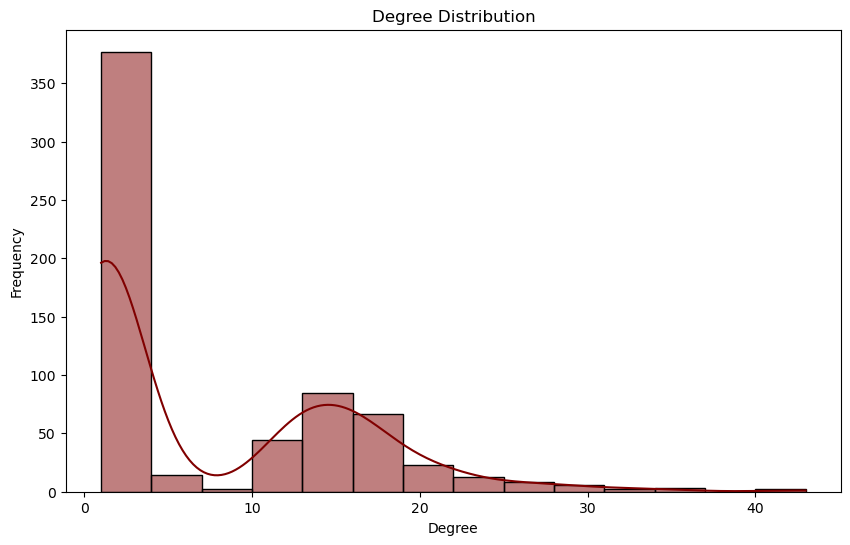

In [22]:
# Do the degree distribution with seaborn
import seaborn as sns

# Create a pandas Series from the degree list
degree_series = pd.Series(degrees)

# Plot the degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(degree_series, color='maroon', kde=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


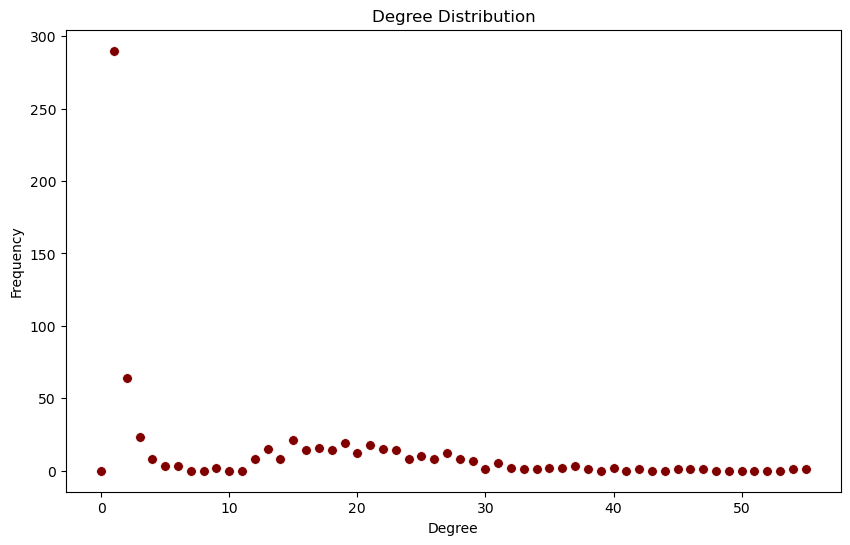

In [37]:
# scatter plot of the degree distribution with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(degree_distribution)), y=degree_distribution, color='maroon', s=50)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


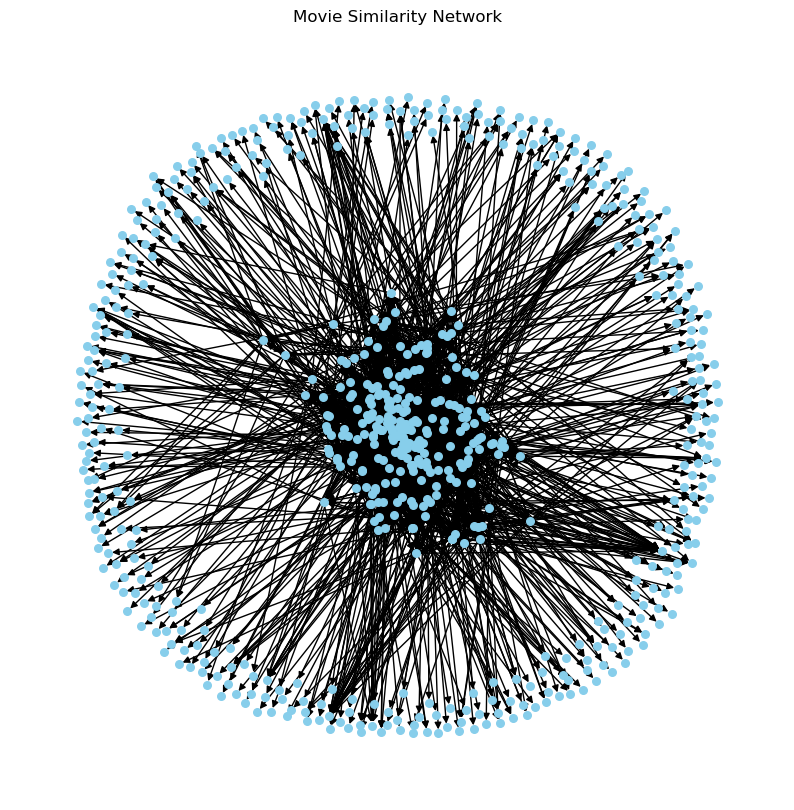

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/Users/nerea/Documents/MasterDTU/SocialGraphs_fall24/Projects/socialGraphs_fall24/FinalProject/top_movie_data_with_similar.csv'  # Replace with the actual file path


df = pd.read_csv(file_path)

# Create an empty undirected graph
G = nx.DiGraph()

# Add nodes and edges based on the similarity list
for index, row in df.iterrows():
    film = row['Name']
    similar_films = row['Similar Movies'].split(', ')  # Splitting the similar films into a list
    
    # Add the film as a node (it will be added automatically when creating edges)
    G.add_node(film)
    
    # Add edges between the film and its similar films
    for similar_film in similar_films:
        G.add_edge(film, similar_film)

# Find all self-loops in the graph
self_loops = list(nx.selfloop_edges(G))

# Delete all self-loops
for edge in self_loops:
    G.remove_edge(edge[0], edge[1])

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=False, node_size=30, node_color='skyblue', font_size=10)
plt.title("Movie Similarity Network")
plt.axis('off')
plt.show()


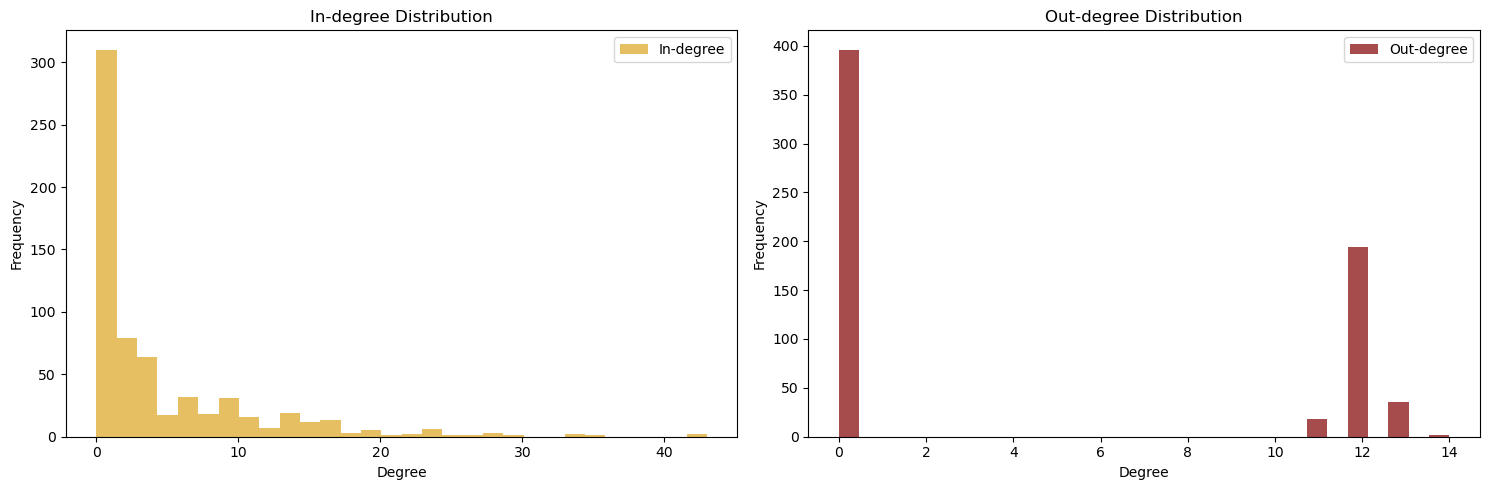

In [19]:
import matplotlib.pyplot as plt

# Get the in-degree and out-degree for each node
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the in-degree distribution as a histogram in the first subplot
ax1.hist(in_degrees, bins=30, color='goldenrod', alpha=0.7, label='In-degree')
ax1.set_title("In-degree Distribution")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")
ax1.legend()

# Plot the out-degree distribution as a histogram in the second subplot
ax2.hist(out_degrees, bins=30, color='maroon', alpha=0.7, label='Out-degree')
ax2.set_title("Out-degree Distribution")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

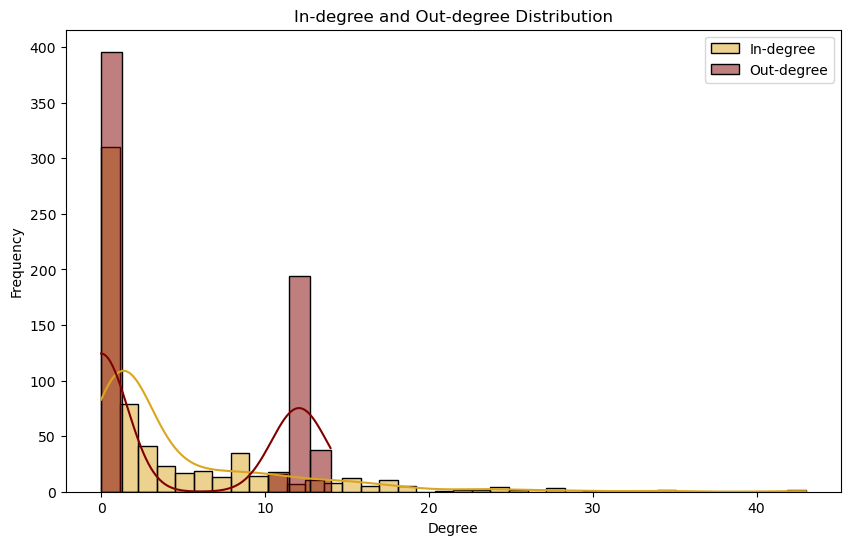

In [23]:
# plot in and out degree distribution with seaborn
import seaborn as sns

# Create a pandas Series from the degree lists
in_degree_series = pd.Series(in_degrees)
out_degree_series = pd.Series(out_degrees)

# Create a figure and plot both histograms in the same plot
plt.figure(figsize=(10, 6))
sns.histplot(in_degree_series, color='goldenrod', kde=True, label='In-degree')
sns.histplot(out_degree_series, color='maroon', kde=True, label='Out-degree')
plt.title("In-degree and Out-degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()




Text(0, 0.5, 'Frequency')

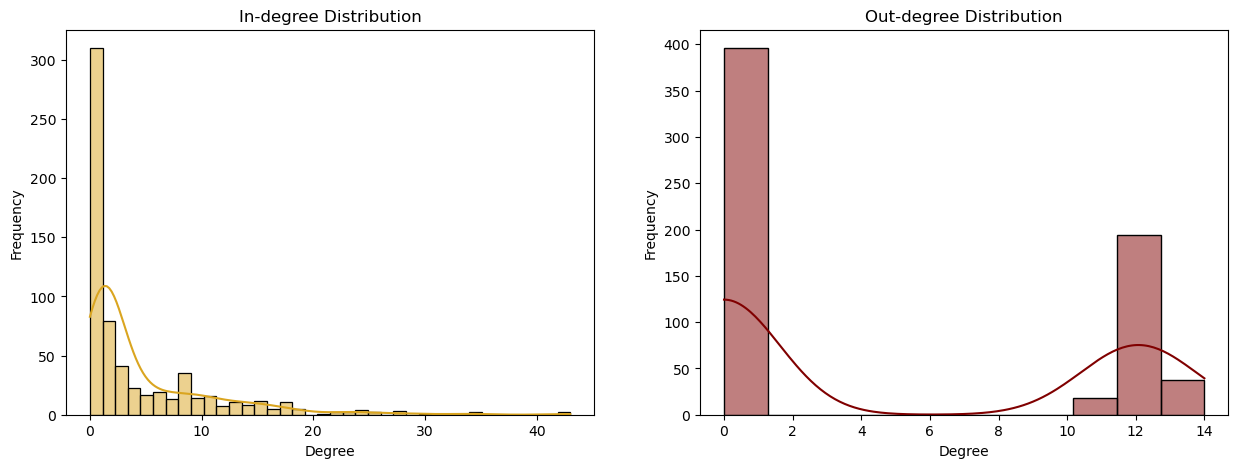

In [24]:
# Plot histograms in separate plots same figure with seaborn
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the in-degree distribution as a histogram in the first subplot
sns.histplot(in_degree_series, color='goldenrod', kde=True, ax=ax1)
ax1.set_title("In-degree Distribution")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")

# Plot the out-degree distribution as a histogram in the second subplot
sns.histplot(out_degree_series, color='maroon', kde=True, ax=ax2)
ax2.set_title("Out-degree Distribution")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")
